In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
path=r"C:\Users\osmai\Downloads\loan_approval.csv"
df=pd.read_csv(path)
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [5]:
df.groupby('loan_approved')['years_employed'].agg('count')

loan_approved
False    1121
True      879
Name: years_employed, dtype: int64

In [6]:
df['loan_approved'].unique()


array([False,  True])

In [7]:
df['points'].nunique()

19

In [8]:
df.describe()


,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


In [9]:
df['loan_approved_num']=df['loan_approved'].map({False:0,True:1})
df.head()


,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved,loan_approved_num
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False,0
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False,0
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False,0
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False,0
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False,0


In [10]:
df=df.drop(columns=['name','city'])
df.head()


,income,credit_score,loan_amount,years_employed,points,loan_approved,loan_approved_num
0,113810,389,39698,27,50.0,False,0
1,44592,729,15446,28,55.0,False,0
2,33278,584,11189,13,45.0,False,0
3,127196,344,48823,29,50.0,False,0
4,66048,496,47174,4,25.0,False,0


In [11]:
df1=df.loc[:,('income','credit_score','loan_amount','points','years_employed','loan_approved_num')].corr()
df1

,income,credit_score,loan_amount,points,years_employed,loan_approved_num
income,1.000000,-0.027113,0.037612,0.451142,-0.014441,0.238066
credit_score,-0.027113,1.000000,-0.008076,0.740899,0.023598,0.715788
loan_amount,0.037612,-0.008076,1.000000,-0.223039,0.013015,-0.157859
points,0.451142,0.740899,-0.223039,1.000000,0.156441,0.821415
years_employed,-0.014441,0.023598,0.013015,0.156441,1.000000,0.104408
loan_approved_num,0.238066,0.715788,-0.157859,0.821415,0.104408,1.000000


<Axes: >

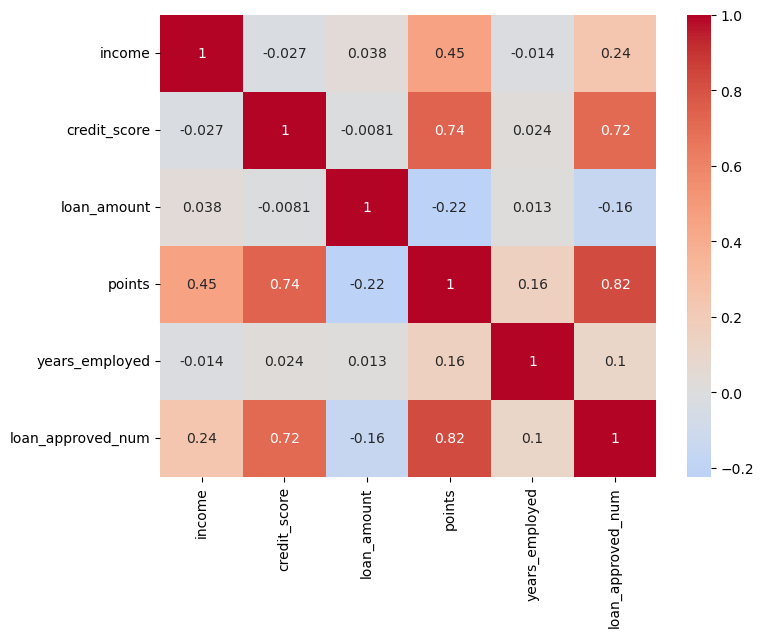

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df1,annot=True,center=0,cmap='coolwarm')


### vemos que la variable 'points' es una variable que esta altamente correlacionada con nuestra variable dependiente, esto puede ser una señal que nos indica que es una variable predictora importante.

In [14]:
X=df[['income','credit_score','loan_amount','points','years_employed']]
y=df['loan_approved_num']

In [15]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [16]:
lm=linear_model.LogisticRegression()
rfe=RFE(lm,n_features_to_select=1)
rfe=rfe.fit(X,y)
rfe.support_


C:\Users\osmai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\osmai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([False, False, False,  True, False])

In [17]:
rfe.ranking_

array([4, 3, 5, 1, 2])

## para este caso vamos a tomar solamente 1 variable y vemos como se comporta el modelo, en este caso decidimos tomar la variable predictora 'point', dejandonos llevar por nuestro instinto. 

In [19]:
X=df[['points']]


In [20]:
from sklearn import linear_model
logistic_model=linear_model.LogisticRegression()
logistic_model.fit(X,y)


LogisticRegression()

In [21]:
logistic_model.score(X,y)

1.0

In [22]:
y.mean()

0.4395

In [23]:
pd.DataFrame(list(zip(X.columns,np.transpose(logistic_model.coef_))))

,0,1
0,points,[2.4154643625046717]


## vemos que en efecto la variable 'points' es la variable predictora de nuestro modelo. 

## vamos a hacer validacion para ver que tan bien predice nuestro modelo y descartar algun problema de overfitting.

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=linear_model.LogisticRegression()
lr.fit(X_train,y_train)
predict_proba=lr.predict_proba(X_test)[:,1:]
predict_proba

array([[2.83631001e-03],
       [1.00000000e+00],
       [2.34758591e-08],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99999976e-01],
       [9.97106732e-01],
       [9.97106732e-01],
       [2.34758591e-08],
       [1.08932772e-28],
       [2.34758591e-08],
       [1.00000000e+00],
       [2.83631001e-03],
       [1.00000000e+00],
       [1.93756271e-13],
       [1.00000000e+00],
       [1.31984914e-23],
       [1.59915305e-18],
       [1.00000000e+00],
       [9.97106732e-01],
       [2.34758591e-08],
       [2.34758591e-08],
       [1.00000000e+00],
       [1.31984914e-23],
       [1.00000000e+00],
       [9.97106732e-01],
       [1.31984914e-23],
       [1.08932772e-28],
       [1.93756271e-13],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.08932772e-28],
       [1.59915305e-18],
       [1.00000000e+00],
       [2.83631001e-03],
       [9.99999976e-01],
       [1.00000000e+00],
       [9.99999976e-01],
       [1.00000000e+00],
       [2.83631001e-03],


In [28]:
predic=lr.predict(X_test)
predic

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,

In [29]:
predict_proba
df_new=pd.DataFrame(predict_proba)
threshold=0.2
df_new['prediction']=np.where(df_new[0]>=threshold,1,0)
df_new['actual']=predic
df_new.head()

,0,prediction,actual
0,2.836310e-03,0,0
1,1.000000e+00,1,1
2,2.347586e-08,0,0
3,1.000000e+00,1,1
4,1.000000e+00,1,1


In [30]:
matrix=pd.crosstab(df_new['prediction'],df_new['actual'])
matrix

actual,0,1
prediction,,
0,220,0
1,0,180


### vemos que en efecto nuestro modelo ha aprendido a clasificar perfectamente quien tiene una aprobacion y quien no. 

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
lr=linear_model.LogisticRegression()
scores=cross_val_score(lr,X,y,scoring='accuracy',cv=50)
scores.mean()

1.0

## quisimos hacer una comprobacion adicional con validacion cruzada y comprobamos que en efecto tenemos un score de 1, es decir nuestro modelo aprendio perfectamente a predecir quien y quien no tiene un credito aprobado. 


In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
predict_proba
fpr,tpr,threholds=roc_curve(y_test,predict_proba)
roc_auc=roc_auc_score(y_test,predict_proba)

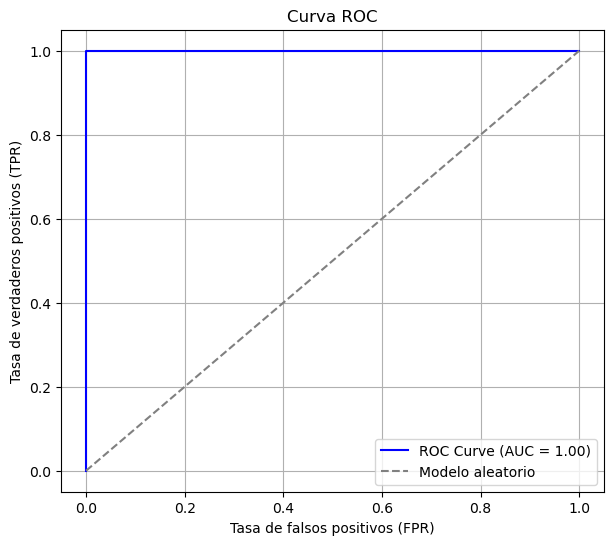

In [36]:
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Modelo aleatorio')
plt.title('Curva ROC')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.legend()
plt.grid(True)
plt.show()

### vemos aqui el grafico con la curva roc. 

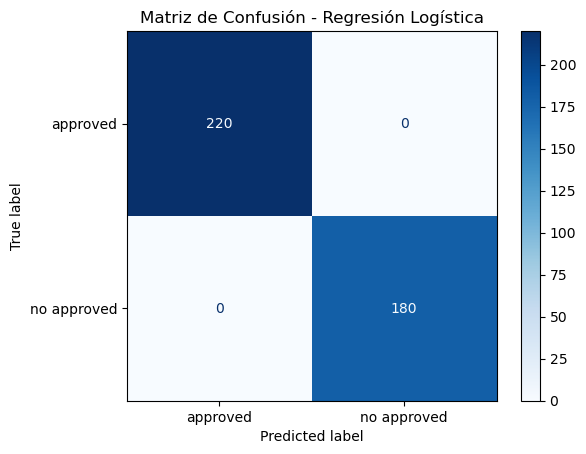

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predic)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['approved', 'no approved'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

## vemos que nuestro modelo es capaz de predecir con los datos de entrenamiento que le hemos suministrado descartando asi un sobreajuste en los datos. Gracias por la atencion prestada. 